### Homework 10
### Rania Siddiqui 07494
### rs07494@st.habib.edu.pk


In [ ]:
# from nltk.tokenize import word_tokenize
# from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Question 1

In [ ]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

nlp = en_core_web_sm.load()
ny_bb = url_to_string('https://www.bbc.com/news/articles/cvgl056yj2vo')
article = nlp(ny_bb)
print("There are",len(article.ents), "entities in the article")

There are 187 entities in the article


In [ ]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'NORP': 22,
         'GPE': 52,
         'PERSON': 24,
         'ORG': 36,
         'CARDINAL': 20,
         'DATE': 24,
         'PERCENT': 3,
         'ORDINAL': 4,
         'TIME': 1,
         'LOC': 1})

The above output shows the variety of entities in the selected blog/article. There are about 52 geopolitical locations, 24 dates, 24 person and so on.

In [ ]:
items = [x.text for x in article.ents]
Counter(items).most_common(5)


[('Gaza', 16), ('Israeli', 12), ('WHO', 6), ('Israel', 5), ('Romania', 4)]

The most common words include Gaza , Israel, and Israeli because the article is about the current war going on in Gaza published in BBC.

In [ ]:
sentences = [x for x in article.sents]
print(len(sentences))
print(sentences[0])

56
Palestinian patients leave Gaza in rare medical evacuationSkip to contentBritish Broadcasting CorporationWatchHomeNewsUS ElectionSportBusinessInnovationCultureArtsTravelEarthVideoLiveHomeNewsIsrael-Gaza WarWar in UkraineUS & CanadaUKUK PoliticsEnglandN. IrelandN.


**This is the first sentence/heading of the article**

In [ ]:
displacy.render(nlp(str(sentences[0])), jupyter=True, style='ent')

The above output highlights the name entity in the first sentence of the Article where Gaza is a country and Palestinian is nationality group.

In [ ]:
dict([(str(x), x.label_) for x in nlp(str(sentences[0])).ents])

{'Palestinian': 'NORP',
 'Gaza': 'GPE',
 'Broadcasting CorporationWatchHomeNewsUS ElectionSportBusinessInnovationCultureArtsTravelEarthVideoLiveHomeNewsIsrael-Gaza WarWar': 'PERSON',
 'UkraineUS & CanadaUKUK PoliticsEnglandN. IrelandN.': 'ORG'}

In [ ]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[0])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('Palestinian', 'ADJ', 'palestinian'),
 ('patients', 'NOUN', 'patient'),
 ('leave', 'VERB', 'leave'),
 ('Gaza', 'PROPN', 'Gaza'),
 ('rare', 'ADJ', 'rare'),
 ('medical', 'ADJ', 'medical'),
 ('evacuationSkip', 'PROPN', 'evacuationSkip'),
 ('contentBritish', 'VERB', 'contentbritish'),
 ('Broadcasting', 'NOUN', 'broadcasting'),
 ('CorporationWatchHomeNewsUS', 'NOUN', 'corporationwatchhomenewsus'),
 ('ElectionSportBusinessInnovationCultureArtsTravelEarthVideoLiveHomeNewsIsrael',
  'PROPN',
  'ElectionSportBusinessInnovationCultureArtsTravelEarthVideoLiveHomeNewsIsrael'),
 ('Gaza', 'PROPN', 'Gaza'),
 ('WarWar', 'PROPN', 'WarWar'),
 ('UkraineUS', 'PROPN', 'UkraineUS'),
 ('&', 'CCONJ', '&'),
 ('CanadaUKUK', 'PROPN', 'CanadaUKUK'),
 ('PoliticsEnglandN.', 'NOUN', 'politicsenglandn.'),
 ('IrelandN.', 'NOUN', 'irelandn.')]

The above output highlights the nature of every word used in the first sentence of article. And it has correctly classified every word as noun, verb, adjective and so on.

In [ ]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

 Analysis

The above techniques I used helped me to identify the entities and stakeholders that were mentioned in my article. The algorithm has done a pretty good job in highlighting most of the entities in the article. Moreover it also classifies those on the based of their nature like location, person names, dates, etc.
Another interesting about the algorithm is that it was working correctly on the Urdu language as well which I was not expecting. It has highlited the entities in the urdu sentences used in article but it has missed so many enteries in Urdu like person names etc.

# Question 2

In [ ]:
! pip install tika
from tika import parser

In [ ]:
raw = parser.from_file('Hw13_RP.pdf')
text = raw['content']

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
import re

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
token_words = nltk.tokenize.word_tokenize(text)
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "Q", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t.", "s"])
no_stopwords = [word for word in token_words if word.lower() not in stopwords]
nonPunct = re.compile('.*[A-Za-z].*')
cleaned = [w for w in no_stopwords if nonPunct.match(w)]
filteredwordfreq = nltk.FreqDist(cleaned)
filteredwordfreq.most_common(10)

[('satisfaction', 228),
 ('life', 215),
 ('university', 214),
 ('https', 205),
 ('anxiety', 155),
 ('student', 152),
 ('depression', 138),
 ('students', 126),
 ('among', 75),
 ('model', 69)]

<Axes: title={'center': 'Frequency distribution for 10 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

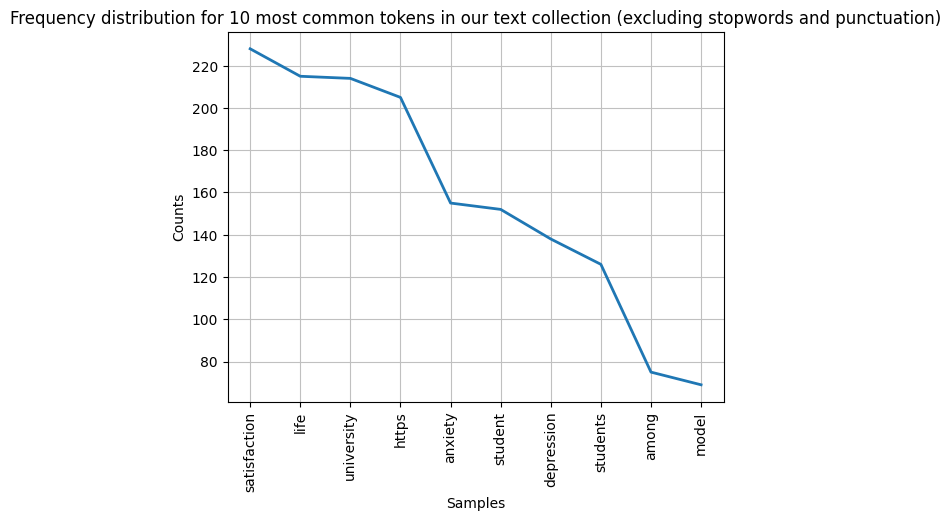

In [ ]:
filteredwordfreq.plot(10, title="Frequency distribution for 10 most common tokens in our text collection (excluding stopwords and punctuation)")

The above output and visualization shows the 10 most common words in my pdf research article. Since the article is about depression, anxiety, and student satisfaction with university life among college students, the most common words are satisfaction, life, university, anxiety, depression and students.

In [ ]:
# ! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

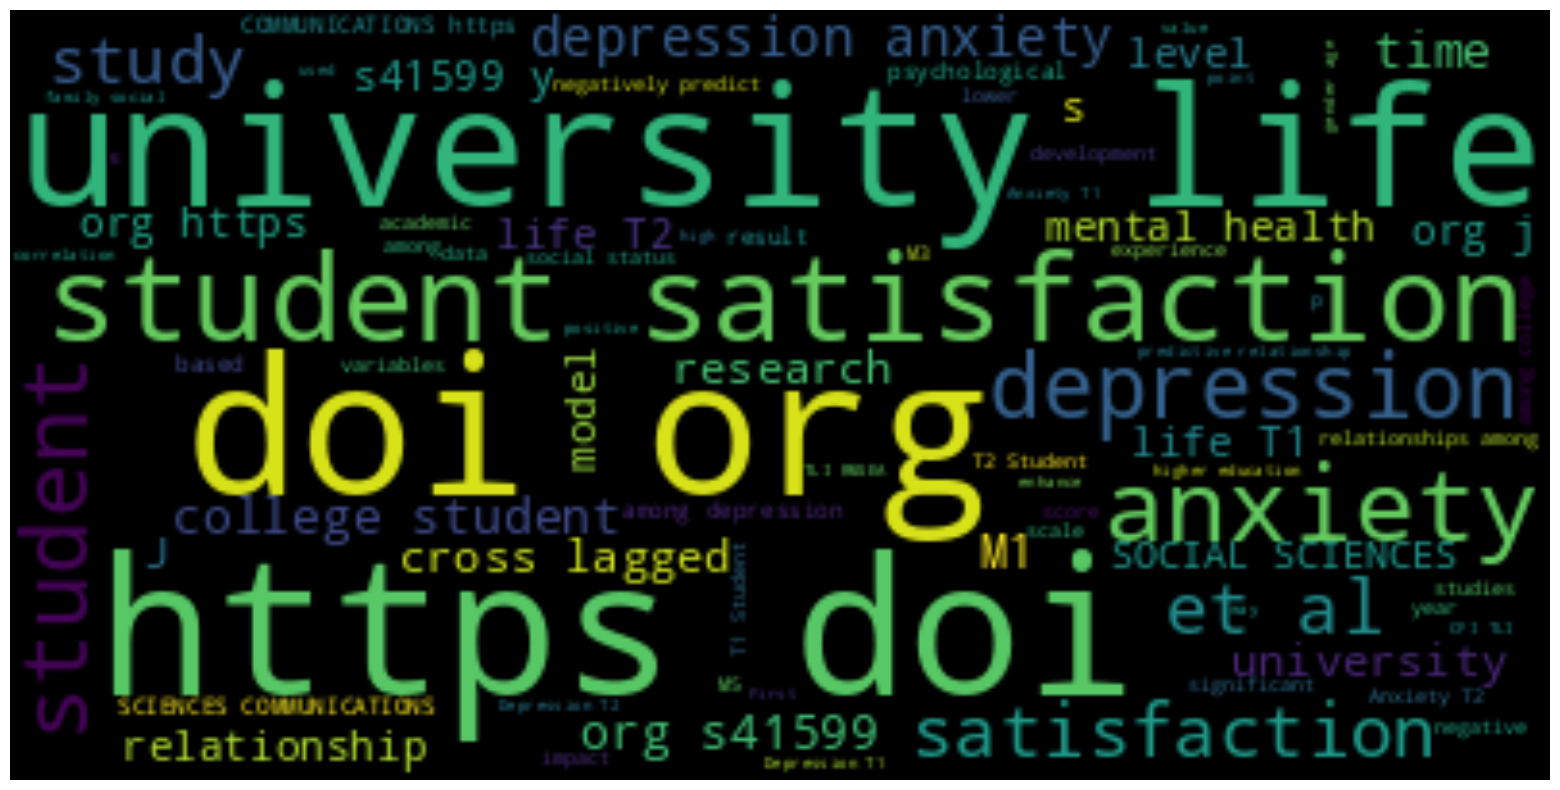

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The above visualisation contains wordcloud of the article. It shows the 100 most commonly used words in my article. The display size of the words is directly proportional to their frequency in the article

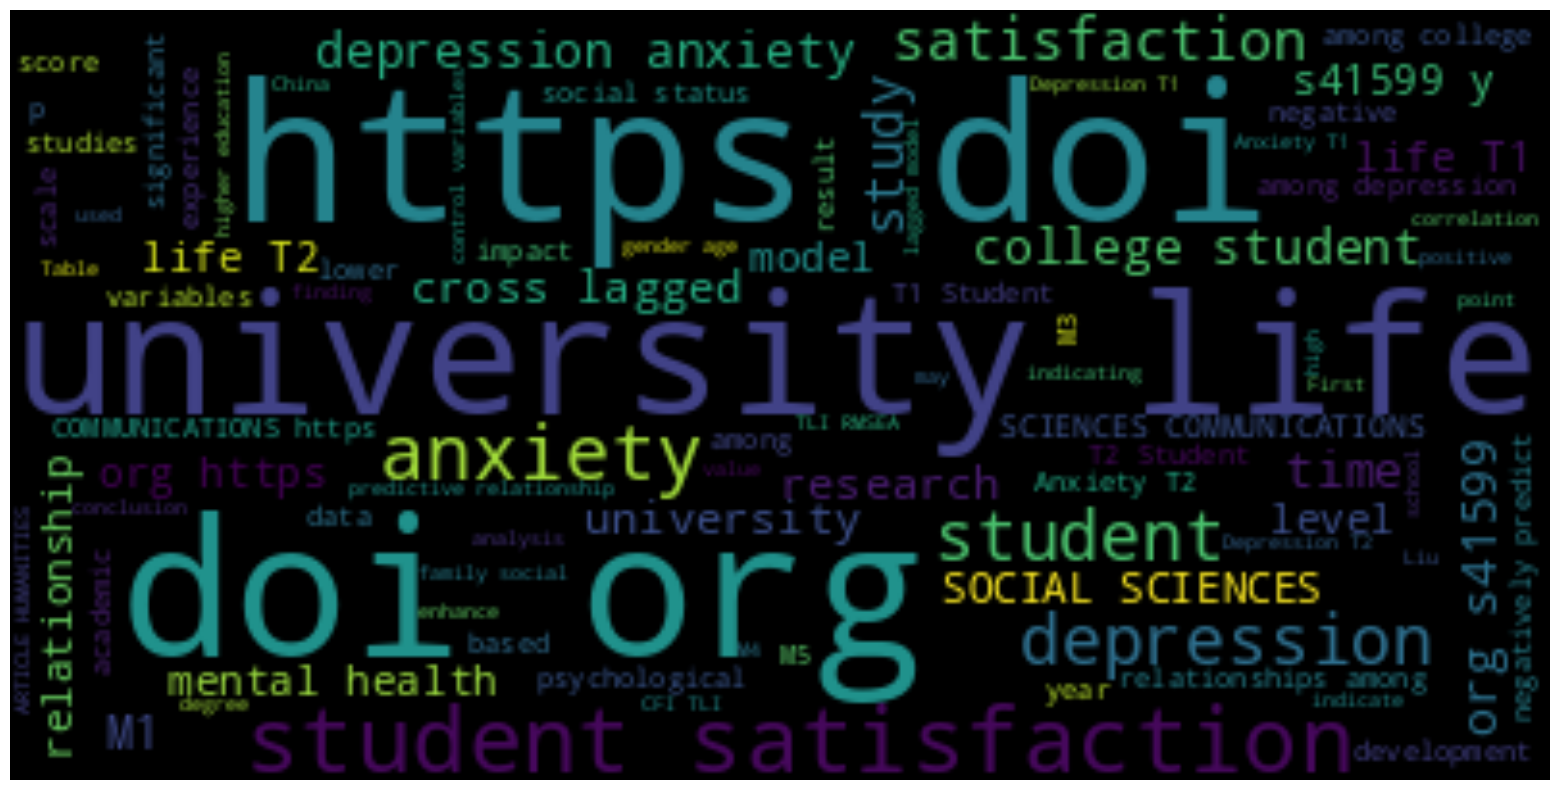

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above wordcloud was generated after removing the stopwords and punctuations.

In [ ]:
# !pip install yake
# ! pip install rake_nltk
from rake_nltk import Rake
import yake
r = Rake()
r.extract_keywords_from_text(text)
r.get_ranked_phrases_with_scores()[:10]

[(180.1452235772358,
  'including “ teaching facilities ,” “ teachers ’ research capabilities ,” “ teachers ’ teaching abilities ,” “ academic status'),
 (141.8128559961268, '081 min 0 0 9 0 0 9 max 40 40 90 38 38 90 kurtosis 1'),
 (121.7803437967115,
  'university life h2 (-) h1 (-) h1 (-) h3 (-) control variables fig'),
 (99.6418068399541,
  'university life m1 m2 m3 gender age gender age m5 family social status family social status extroversion extroversion student satisfaction'),
 (99.6418068399541,
  'university life m1 m2 m3 gender age gender age m5 family social status family social status extroversion extroversion student satisfaction'),
 (86.73254555563511, '1 12 34 56 78 9 0 () :,; http :// crossmark'),
 (74.33253968253968,
  'educational practice conclusions data availability references references author contributions competing interests additional information'),
 (56.64449917898194, 'courses ,” “ extracurricular activities ,” “ student'),
 (52.96343366828463,
  'research ob

The above output shows the keyphrases from the text. The relevancy scores according to the context of words are also given.

In [ ]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('student satisfaction', 8.522634727603586e-05)
('university life', 9.736317026097295e-05)
('university students', 0.0004959272483030193)
('university', 0.0005082766647902449)
('satisfaction', 0.0005111707965470614)
('student', 0.0006048379210616673)
('life', 0.0006901024005859893)
('Depression', 0.0007653069239735849)
('anxiety', 0.0008136204464557292)
('students', 0.0011192327885066367)
('life satisfaction', 0.0013511603403215926)
('college students', 0.001496335542463083)
('SOCIAL SCIENCES', 0.0020872002310346623)
('SCIENCES COMMUNICATIONS', 0.0023380185738960607)
('Chinese university', 0.00327148687684404)
('model', 0.003947960388172248)
('SOCIAL', 0.004554493834519111)
('depression anxiety', 0.006587223892775038)
('family social', 0.0071423485194183995)
('satisfaction model', 0.007306257163301785)


The output above shows the most common words along with their score of importance in the chosen paper.

The topic of my paper is about depression, anxiety, and student satisfaction with university life among college students. It talks about how satisfied students are with their university life and also talks about depression and anxiety amongst university students. A method employing frequency graphs was implemented to chart the most frequently occurring words in the document, which showed that students, depression and anxiety were ranked amongst the top words, showing their relevancy to the article.

One limitation of the given algorithm was the treatment of words with similar meanings as separate entities. Sometimes words with starting capital letters were also treated as different entities. The word cloud technique was employed for the visualization of key terms from the document, yielding effective outcomes. For the task of automated keyword extraction, both Rake and Yake libraries were utilized. The output of Yake seemed more significant than that of Rake.

### Question 3

In [ ]:
ttext = open('tweets.txt','r')
corpus = ttext.read()
print(corpus)

1. Indians are sore losers.
2. This Win Will Help Us Heal From The World Cup Well played India and Hope we won the T20 WC Next Year under Ro-Hit Man Sharma's leadership.
3. Dedicated to the guy that screwed Tilak varma and K L Rahul's records
4. India is dreaming about World Cup alwys and itz not a bad to dream!!
5. Australian Cricketers Face Fatigue with T20 Challenge in India
6. Seems like, Google is still in the World Cup mood. Come on man! wake up to reality 
7. Who is Mohammad Kaif taking a dig at here?
8. Prasidh Krishna straight up garbage. 
9. Get Bishnoi, Kuldeep, Ashwin, Shami and Bumrah in top 11 in the T20 World Cup 24. 
10. Well Done Team India. Well deserved victory! 
11. A lucky fan of Babar Azam came to met him and he bring a gift for Babar.
12. Babar being single.
13. This is going to be me in the future opening a restaurant for Babar azam.
14. Pakistan has chased 200 only three times in T20I history. In all these chases, Babar was the man of the match. 
15. Sarfaraz A

In [ ]:
from textblob import TextBlob

positive = 0
negative = 0
nuetral = 0

for line in corpus:
    analysis = TextBlob(line)
    print(line, analysis.sentiment)
    if analysis.sentiment.polarity > 0:
        positive = positive + 1
    elif analysis.sentiment.polarity < 0:
        negative = negative + 1
    else:
        nuetral = nuetral + 1

print("Positive Tweets: ", positive)
print("Negative Tweets: ", negative)
print("Neutral Tweets: ", nuetral)

1. Indians are sore losers. Sentiment(polarity=-0.2, subjectivity=0.2)
2. This Win Will Help Us Heal From The World Cup Well played India and Hope we won the T20 WC Next Year under Ro-Hit Man Sharma's leadership. Sentiment(polarity=0.4, subjectivity=0.2)
3. Dedicated to the guy that screwed Tilak varma and K L Rahul's records Sentiment(polarity=0.0, subjectivity=0.0)
4. India is dreaming about World Cup alwys and itz not a bad to dream!! Sentiment(polarity=0.5, subjectivity=0.6666666666666666)
5. Australian Cricketers Face Fatigue with T20 Challenge in India Sentiment(polarity=0.0, subjectivity=0.0)
6. Seems like, Google is still in the World Cup mood. Come on man! wake up to reality  Sentiment(polarity=0.0, subjectivity=0.0)
7. Who is Mohammad Kaif taking a dig at here? Sentiment(polarity=0.0, subjectivity=0.0)
8. Prasidh Krishna straight up garbage.  Sentiment(polarity=0.2, subjectivity=0.4)
9. Get Bishnoi, Kuldeep, Ashwin, Shami and Bumrah in top 11 in the T20 World Cup 24.  Sentime

The algorithm worked pretty fine in finding out the positive and negative sentiments about the tweets. However I have noticed that the model gives positive polarity to a tweet which labeled a player as garbage maybe because the model has been trained on the adjectives like good bad and so on. Moreover the model is also unable to see sarcasm as a negative sentiment as it should be for example in the line 3 the tweet was dedicated for a guy who ruined other players performance and the model labelled it as neutral

In [ ]:
high = 0
low = 0
highesttweet = ""
lowesttweet = ""

for line in corpus:
    analysis = TextBlob(line)
    if analysis.sentiment.polarity >= 0:
        if analysis.sentiment.polarity > high:
            high = analysis.sentiment.polarity
            highesttweet = line
    elif analysis.sentiment.polarity < 0:
        if analysis.sentiment.polarity < low:
            low = analysis.sentiment.polarity
            lowesttweet = line

print("Lowest polarity: ", low)
print("The tweet: ", lowesttweet)
print("Highest polarity: ", high)
print("The tweet: ", highesttweet)

Lowest polarity:  -1.0
The tweet:  16. Babar is a pathetic player.
Highest polarity:  0.5
The tweet:  4. India is dreaming about World Cup alwys and itz not a bad to dream!!


It worked well in highlighting the most negative and positive tweet. The positive tweet is about hope of winning which is a positive sentiment indeed. The same goes for negative tweet which labeled an entire group of people as losers.

### Question 4

In [2]:
import pandas as pd


In [3]:
courses = pd.read_csv('CourseraDataset-Clean.csv', usecols=['Course Title', 'What you will learn', 'Skill gain'])
courses = courses[courses['What you will learn'] != 'Not specified']
courses = courses.drop_duplicates()

In [4]:
courses

,Course Title,What you will learn,Skill gain
4,The Blues: Understanding and Performing an Ame...,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation"
5,So You Think You Know Tango?,Gain an appreciation for the Argentine Tango a...,Not specified
13,Basic Elements of Design: Design Principles an...,Recognize ways to work with graphic designers ...,"Print Design, online design, Color Theory, Gra..."
19,Cultura Maya en Yucatán,Conocerás los aspectos fundamentales de la Cul...,Not specified
20,Antisemitismo: Desde sus orígenes hasta el pre...,A debatir qué es el antisemitismo y qué tiene ...,"Holocaust, Middle East, Israel, defeatism"
...,...,...,...
8349,Políticas educativas efectivas basadas en evid...,Identificar los impactos en la cotidianidad qu...,"Políticas educativas, Políticas pública, Desar..."
8356,La Economía de la Felicidad,Comprender la propuesta teórica de la economía...,Not specified
8359,Tools and Practices for Addressing Pandemic Ch...,How to use data to make informed decisions and...,"Data Science, Pandemic, Public Health, social ..."
8360,Felicidad y Políticas Públicas,Conocer las características de los conceptos d...,"Democracia, Ciudadanía, Políticas públicas, Fe..."


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
def clean_more_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",str(text))
  text=re.sub("(\\d|\\W)+"," ",str(text))
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if clean_more_txt(word)]
  clean_text2 = [word for word in clean_text if clean_more_txt(word)]
  return " ".join(clean_text2)

In [9]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Using TF-IDF method

In [10]:
#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((courses['Skill gain'])) #fitting and transforming the vector
tfidf_jobid

<3045x4737 sparse matrix of type '<class 'numpy.float64'>'
	with 24801 stored elements in Compressed Sparse Row format>

In [11]:
print(tfidf_jobid[0,:])

  (0, 2654)	0.2827714129832806
  (0, 644)	0.4029549399043916
  (0, 2204)	0.7823569317792076
  (0, 2000)	0.38155638600750896


In [12]:
courses.shape

(3045, 3)

In [13]:
query = courses.iloc[[0]]

In [14]:
query

,Course Title,What you will learn,Skill gain
4,The Blues: Understanding and Performing an Ame...,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation"


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

#convert query input to TF-IDF
user_tfidf = tfidf_vectorizer.transform(query['Skill gain'])

#Calculate similarity score of query data with every record in the original data
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_jobid)

In [16]:
output2 = list(cos_similarity_tfidf)

In [17]:
def get_recommendation(top, courses, scores):
    recommendation = pd.DataFrame(columns=['Skill gain', 'score'])
    for idx, i in enumerate(top):
        recommendation.at[idx, 'Skill gain'] = courses['Skill gain'].iloc[i]
        recommendation.at[idx, 'score'] = scores[idx]
    return recommendation

In [18]:
# Get the top 10 most similar courses
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]

# Get the recommendations
results = get_recommendation(top, courses, list_scores)

In [19]:
results

,Skill gain,score
0,"Music, Chord, Jazz, Jazz Improvisation",1.0
1,"Music Performance, Music, Jazz, Jazz Improvisa...",0.851031
2,"Music, Chord, Jazz, Scales, Music theory",0.673074
3,"Music, Jazz, Music composition, Classical Musi...",0.465462
4,"Improvisation, Music Education, Music, Songwri...",0.354227
5,"Improvisation, Finger Independence, Piano Perf...",0.25475
6,"Music, Music production, music editing, Music ...",0.247371
7,"Music Performance, Music, Music composition, M...",0.244641
8,"Improvisation, Effective Practice Techniques, ...",0.22663
9,"Music, Performance, Music composition, Music t...",0.223735


In [20]:
# Importing necessary libraries here
import sys
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore') # no warnings

In [23]:
#splitting the description into words
corpus = []
for words in courses['Skill gain']:
    corpus.append(words.split())

In [38]:
# Reset index to ensure it's continuous starting from 0
courses.reset_index(drop=True, inplace=True)

courses['id'] = courses.index

# Now create the documents list with the correct ids
documents = [TaggedDocument(doc, [str(courses['id'][i])]) for i, doc in enumerate(corpus)]

In [39]:
max_epochs = 5
vec_size = 15
alpha = 0.025

dl_model = Doc2Vec(vector_size=vec_size,
                alpha=alpha,
                min_alpha=0.00025,
                min_count=1,
                dm =1,
                epochs=max_epochs)

dl_model.build_vocab(documents)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    dl_model.train(documents,
                total_examples=dl_model.corpus_count,
                epochs=dl_model.epochs)
    # decrease the learning rate
    dl_model.alpha -= 0.0002
    # fix the learning rate, no decay
    dl_model.min_alpha = dl_model.alpha

iteration 0


iteration 1
iteration 2
iteration 3
iteration 4


In [40]:
# Reset index if needed
courses = courses.reset_index(drop=True)

# Now access the first element in the 'What you will learn' column
print(courses['Skill gain'][2])

Print Design, online design, Color Theory, Graphic Design, textual elements


In [41]:
dl_model[0]

array([ 0.05132441,  2.2051094 ,  1.8316882 ,  2.8325067 , -1.2207633 ,
       -3.3046393 , -3.6707013 ,  2.7704828 , -1.2680898 ,  3.2921104 ,
        7.0239964 ,  0.10218546,  1.5808606 ,  2.7065394 , -2.1764708 ],
      dtype=float32)

In [42]:
dl_model.wv.most_similar('python',topn=10)

[('classes,', 0.9672325253486633),
 ('Class', 0.9670037627220154),
 ('tidyverse', 0.9646498560905457),
 ('python,', 0.9607680439949036),
 ('Menu,', 0.9579483270645142),
 ('Conditionals,', 0.9496394991874695),
 ('Memory,', 0.9493899941444397),
 ('Higher-Order', 0.946110188961029),
 ('Typescript,', 0.9449165463447571),
 ('Memory', 0.9442225098609924)]

In [43]:
dl_model.save("courses_doc2vec.model")

In [44]:
query = courses['Skill gain'][0]
query

'Music, Chord, Jazz, Jazz Improvisation'

In [45]:
query_data_tokenize = word_tokenize(query)
v1 = dl_model.infer_vector(query_data_tokenize)
similar_records=dl_model.dv.most_similar([v1])

In [46]:
similar_records

[('42', 0.935740053653717),
 ('11', 0.9309098124504089),
 ('24', 0.9231994152069092),
 ('23', 0.9220356941223145),
 ('9', 0.9168462753295898),
 ('59', 0.9111104011535645),
 ('85', 0.9089158773422241),
 ('76', 0.9079629182815552),
 ('78', 0.9075767993927002),
 ('79', 0.9061812162399292)]

In [47]:
i = 0

In [48]:
idx = courses[courses['id']==int(similar_records[i][0])]
idx['score'] = similar_records[i][1]
idx

,Course Title,What you will learn,Skill gain,id,score
42,Guitar for Beginners,Identify string names and numbers and read mus...,"Guitar, Guitar scales, Music notation, Tablatu...",42,0.93574


In [49]:
courses['Skill gain'][idx.index[0]]

'Guitar, Guitar scales, Music notation, Tablature, Guitar chords'

Both recommendation algorithms work well on the dataset as indicated by the output where the music related skills are highlighted accoridng to the query having music skills.

Comparison:

TF-IDF is better when we're interested in keyword-based matching, especially in cases where terms directly indicate relevance.
Word2Vec is better when we want semantically richer, context-aware recommendations that capture the broader meaning or relationships between concepts.

For high accuracy in contextual recommendation, Word2Vec is generally superior, as it focuses on the meanings and relationships between words, unlike TF-IDF, which can be limited by frequency and direct term matches.